In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('datakelautan.csv')

In [3]:
raw_data.head()

,yyyy-mm-ddThh:mm:ss.sss,Longitude [degrees_east],Latitude [degrees_north],chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],ph [1],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
0,2022-02-01T12:00:00,95.0,-11.0,0.09910,0.49402,0.00280,201.93959,8.02707,1.83672,0.06041,3.02433
1,2022-02-01T12:00:00,95.5,-11.0,0.09933,0.49402,0.00295,201.82983,8.02721,1.84343,0.06002,3.01754
2,2022-02-01T12:00:00,96.0,-11.0,0.09967,0.49402,0.00306,201.77855,8.02654,1.83328,0.06220,2.98639
3,2022-02-01T12:00:00,96.5,-11.0,0.09939,0.49402,0.00333,201.45436,8.02466,1.81943,0.06917,2.93559
4,2022-02-01T12:00:00,97.0,-11.0,0.09993,0.49402,0.00394,201.26645,8.02311,1.81756,0.07204,2.92603


In [4]:
raw_data.describe(include='all')

,yyyy-mm-ddThh:mm:ss.sss,Longitude [degrees_east],Latitude [degrees_north],chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],ph [1],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
count,801306,801306.000000,801306.000000,579216.000000,801306.000000,579216.000000,579216.000000,579216.000000,579216.000000,579216.000000,579216.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-02-01T12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,74865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.042657,-2.522933,0.253921,30.083262,0.907619,195.582851,8.013859,1.488504,0.209228,3.982661
std,NaN,13.438092,5.071595,0.237301,30.218726,2.397205,16.243926,0.034191,0.803219,0.201850,3.410050
min,NaN,95.000000,-11.000000,0.033410,0.494020,0.000003,3.487460,7.655740,0.075490,0.000200,0.686820
25%,NaN,106.500000,-7.000000,0.121360,6.440610,0.002030,197.055530,8.008440,1.180760,0.086790,2.513168
50%,NaN,118.000000,-2.500000,0.192130,18.495560,0.004230,200.277155,8.023520,1.381910,0.132430,3.083485
75%,NaN,129.500000,2.000000,0.308940,47.373690,0.303085,202.128852,8.031860,1.607690,0.275720,4.143300


In [5]:
data = raw_data.drop(['yyyy-mm-ddThh:mm:ss.sss', 'ph [1]', 'Longitude [degrees_east]', 'Latitude [degrees_north]'],axis=1)
data.describe(include='all')

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
count,579216.000000,801306.000000,579216.000000,579216.000000,579216.000000,579216.000000,579216.000000
mean,0.253921,30.083262,0.907619,195.582851,1.488504,0.209228,3.982661
std,0.237301,30.218726,2.397205,16.243926,0.803219,0.201850,3.410050
min,0.033410,0.494020,0.000003,3.487460,0.075490,0.000200,0.686820
25%,0.121360,6.440610,0.002030,197.055530,1.180760,0.086790,2.513168
50%,0.192130,18.495560,0.004230,200.277155,1.381910,0.132430,3.083485
75%,0.308940,47.373690,0.303085,202.128852,1.607690,0.275720,4.143300
max,11.231770,109.729300,25.897950,227.267750,31.377830,1.911260,103.576500


In [6]:
data.isnull().sum()

chl [mg m-3]       222090
depth [m]               0
no3 [mmol m-3]     222090
o2 [mmol m-3]      222090
phyc [mmol m-3]    222090
po4 [mmol m-3]     222090
si [mmol m-3]      222090
dtype: int64

In [7]:
data_no_nv = data.dropna(axis=0)
data_no_nv.isnull().sum()

chl [mg m-3]       0
depth [m]          0
no3 [mmol m-3]     0
o2 [mmol m-3]      0
phyc [mmol m-3]    0
po4 [mmol m-3]     0
si [mmol m-3]      0
dtype: int64

In [8]:
data_no_nv.describe(include='all')

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
count,579216.000000,579216.000000,579216.000000,579216.000000,579216.000000,579216.000000,579216.000000
mean,0.253921,27.210013,0.907619,195.582851,1.488504,0.209228,3.982661
std,0.237301,28.557158,2.397205,16.243926,0.803219,0.201850,3.410050
min,0.033410,0.494020,0.000003,3.487460,0.075490,0.000200,0.686820
25%,0.121360,6.440610,0.002030,197.055530,1.180760,0.086790,2.513168
50%,0.192130,15.810070,0.004230,200.277155,1.381910,0.132430,3.083485
75%,0.308940,40.344050,0.303085,202.128852,1.607690,0.275720,4.143300
max,11.231770,109.729300,25.897950,227.267750,31.377830,1.911260,103.576500


C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chl [mg m-3]', ylabel='Density'>

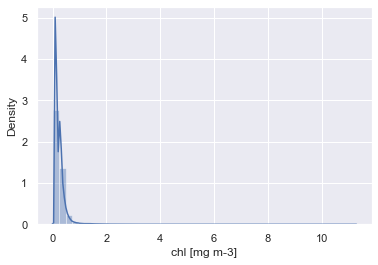

In [9]:
sns.distplot(data_no_nv['chl [mg m-3]'])

In [10]:
q = data_no_nv['chl [mg m-3]'].quantile(0.99)
data_1 = data_no_nv[data_no_nv['chl [mg m-3]']<q]
data_1.describe(include='all')

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
count,573423.000000,573423.000000,573423.000000,573423.000000,573423.000000,573423.000000,573423.000000
mean,0.237528,27.208154,0.904701,195.550532,1.437882,0.209221,3.919122
std,0.155713,28.653780,2.401289,16.199783,0.558446,0.201910,2.963601
min,0.033410,0.494020,0.000003,3.487460,0.075490,0.000200,0.702950
25%,0.121030,6.440610,0.002010,197.062680,1.178340,0.086760,2.510550
50%,0.189250,15.810070,0.004150,200.267780,1.378310,0.132140,3.075170
75%,0.305500,40.344050,0.280285,202.100570,1.597160,0.275970,4.111810
max,1.236930,109.729300,25.897950,224.759990,11.830640,1.911260,103.576500


C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chl [mg m-3]', ylabel='Density'>

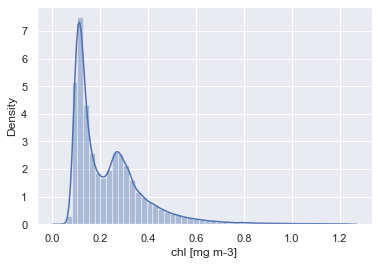

In [11]:
sns.distplot(data_1['chl [mg m-3]'])

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no3 [mmol m-3]', ylabel='Density'>

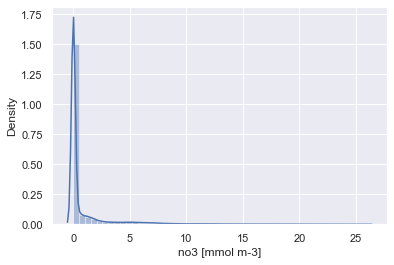

In [12]:
sns.distplot(data_1['no3 [mmol m-3]'])

In [13]:
p = data_1['no3 [mmol m-3]'].quantile(0.99)
data_2 = data_1[data_1['no3 [mmol m-3]']<p]

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no3 [mmol m-3]', ylabel='Density'>

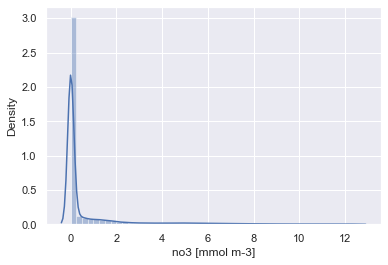

In [14]:
sns.distplot(data_2['no3 [mmol m-3]'])

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='o2 [mmol m-3]', ylabel='Density'>

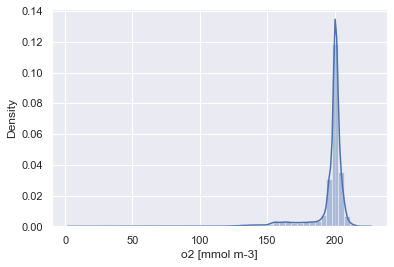

In [15]:
sns.distplot(data_2['o2 [mmol m-3]'])

In [16]:
q = data_2['o2 [mmol m-3]'].quantile(0.01)
data_3 = data_2[data_2['o2 [mmol m-3]']>q]

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='o2 [mmol m-3]', ylabel='Density'>

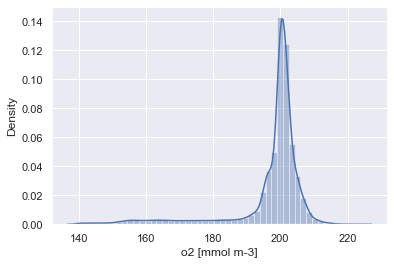

In [17]:
sns.distplot(data_3['o2 [mmol m-3]'])

In [18]:
data_cleaned = data_3.reset_index(drop=True)

In [19]:
data_cleaned

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
0,0.09910,0.49402,0.00280,201.93959,1.83672,0.06041,3.02433
1,0.09933,0.49402,0.00295,201.82983,1.84343,0.06002,3.01754
2,0.09967,0.49402,0.00306,201.77855,1.83328,0.06220,2.98639
3,0.09939,0.49402,0.00333,201.45436,1.81943,0.06917,2.93559
4,0.09993,0.49402,0.00394,201.26645,1.81756,0.07204,2.92603
...,...,...,...,...,...,...,...
562006,0.12542,109.72930,1.86904,184.78323,0.32362,0.36703,2.47903
562007,0.15281,109.72930,1.85197,185.98671,0.39221,0.35775,2.45600
562008,0.15100,109.72930,1.75586,185.74280,0.41870,0.36494,2.42927
562009,0.16022,109.72930,1.96952,182.79945,0.43118,0.39833,2.48200


In [20]:
data_cleaned.describe(include='all')

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
count,562011.000000,562011.000000,562011.000000,562011.000000,562011.000000,562011.000000,562011.000000
mean,0.236318,25.814367,0.660655,197.143870,1.453299,0.192391,3.691530
std,0.155782,27.066824,1.639955,11.444415,0.551371,0.162660,2.303318
min,0.070740,0.494020,0.000003,139.149460,0.182220,0.000200,0.702950
25%,0.120650,6.440610,0.001990,197.512590,1.191510,0.086180,2.499010
50%,0.185880,15.810070,0.003990,200.330780,1.385010,0.130060,3.048480
75%,0.303930,34.434150,0.186520,202.144220,1.603480,0.262370,3.998515
max,1.236930,109.729300,11.835600,224.759990,11.830640,1.002160,99.160820


C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phyc [mmol m-3]', ylabel='Density'>

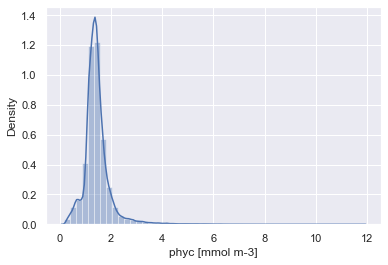

In [21]:
sns.distplot(data_3['phyc [mmol m-3]'])

In [22]:
p = data_3['phyc [mmol m-3]'].quantile(0.99)
data_4 = data_3[data_3['phyc [mmol m-3]']<p]

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phyc [mmol m-3]', ylabel='Density'>

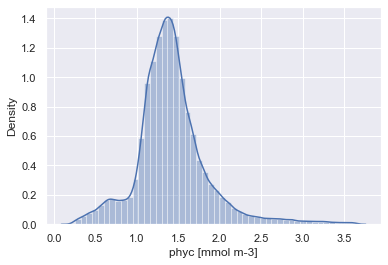

In [23]:
sns.distplot(data_4['phyc [mmol m-3]'])

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='po4 [mmol m-3]', ylabel='Density'>

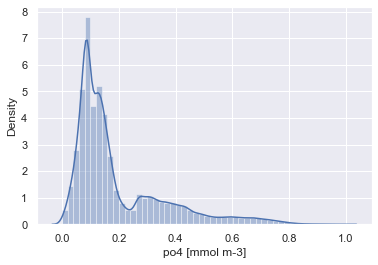

In [24]:
sns.distplot(data_4['po4 [mmol m-3]'])

In [25]:
p = data_4['po4 [mmol m-3]'].quantile(0.99)
data_5 = data_4[data_4['po4 [mmol m-3]']<p]

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='po4 [mmol m-3]', ylabel='Density'>

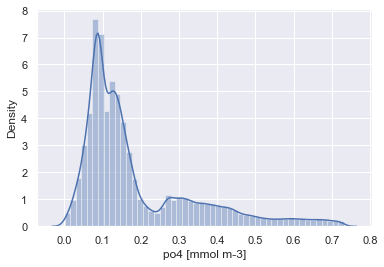

In [26]:
sns.distplot(data_5['po4 [mmol m-3]'])

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='si [mmol m-3]', ylabel='Density'>

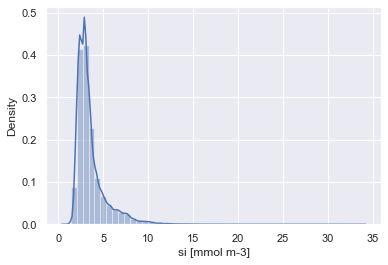

In [27]:
sns.distplot(data_5['si [mmol m-3]'])

In [28]:
p = data_5['si [mmol m-3]'].quantile(0.99)
data_6 = data_5[data_5['si [mmol m-3]']<p]

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='si [mmol m-3]', ylabel='Density'>

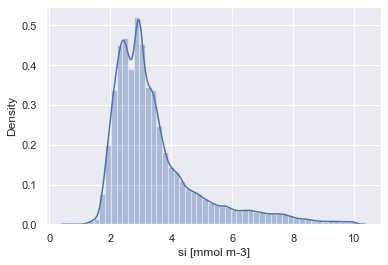

In [29]:
sns.distplot(data_6['si [mmol m-3]'])

In [30]:
data_cleaned = data_6.reset_index(drop=True)
data_cleaned

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
0,0.09910,0.49402,0.00280,201.93959,1.83672,0.06041,3.02433
1,0.09933,0.49402,0.00295,201.82983,1.84343,0.06002,3.01754
2,0.09967,0.49402,0.00306,201.77855,1.83328,0.06220,2.98639
3,0.09939,0.49402,0.00333,201.45436,1.81943,0.06917,2.93559
4,0.09993,0.49402,0.00394,201.26645,1.81756,0.07204,2.92603
...,...,...,...,...,...,...,...
545309,0.12542,109.72930,1.86904,184.78323,0.32362,0.36703,2.47903
545310,0.15281,109.72930,1.85197,185.98671,0.39221,0.35775,2.45600
545311,0.15100,109.72930,1.75586,185.74280,0.41870,0.36494,2.42927
545312,0.16022,109.72930,1.96952,182.79945,0.43118,0.39833,2.48200


In [31]:
data_cleaned.describe(include='all')

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3]
count,545314.000000,545314.000000,545314.000000,545314.000000,545314.000000,545314.000000,545314.000000
mean,0.228091,25.181563,0.572792,197.648476,1.421535,0.187461,3.459106
std,0.141072,26.131133,1.425995,10.169556,0.413326,0.150988,1.467646
min,0.070740,0.494020,0.000003,139.179200,0.187310,0.000200,0.702950
25%,0.119890,6.440610,0.001950,197.730130,1.195970,0.086720,2.484470
50%,0.180220,15.810070,0.003810,200.330065,1.383380,0.130000,3.017070
75%,0.298360,34.434150,0.132528,202.099980,1.591217,0.255190,3.854010
max,1.236900,109.729300,11.756810,221.656710,3.667170,0.731790,10.062280


In [32]:
data_cleaned.to_csv("Data Cleaned No Index.csv", index=False)

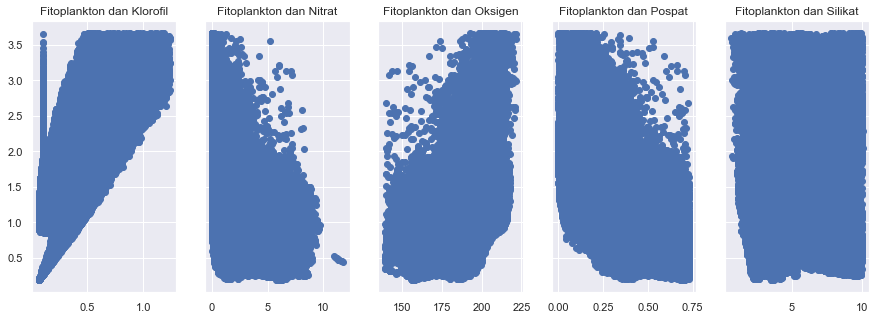

In [33]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,sharey=True,figsize = (15,5))
ax1.scatter(data_cleaned['chl [mg m-3]'], data_cleaned['phyc [mmol m-3]'])
ax1.set_title('Fitoplankton dan Klorofil')
ax2.scatter(data_cleaned['no3 [mmol m-3]'], data_cleaned['phyc [mmol m-3]'])
ax2.set_title('Fitoplankton dan Nitrat')
ax3.scatter(data_cleaned['o2 [mmol m-3]'], data_cleaned['phyc [mmol m-3]'])
ax3.set_title('Fitoplankton dan Oksigen')
ax4.scatter(data_cleaned['po4 [mmol m-3]'], data_cleaned['phyc [mmol m-3]'])
ax4.set_title('Fitoplankton dan Pospat')
ax5.scatter(data_cleaned['si [mmol m-3]'], data_cleaned['phyc [mmol m-3]'])
ax5.set_title('Fitoplankton dan Silikat')

plt.show()

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phyc [mmol m-3]', ylabel='Density'>

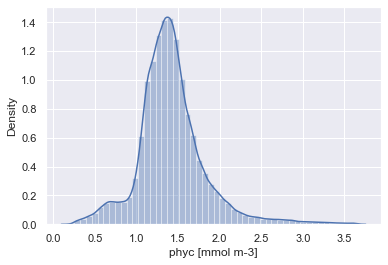

In [34]:
sns.distplot(data_cleaned['phyc [mmol m-3]'])

In [35]:
log_fito = np.log(data_cleaned['phyc [mmol m-3]'])
data_cleaned['log_fito'] = log_fito
data_cleaned

,chl [mg m-3],depth [m],no3 [mmol m-3],o2 [mmol m-3],phyc [mmol m-3],po4 [mmol m-3],si [mmol m-3],log_fito
0,0.09910,0.49402,0.00280,201.93959,1.83672,0.06041,3.02433,0.607981
1,0.09933,0.49402,0.00295,201.82983,1.84343,0.06002,3.01754,0.611628
2,0.09967,0.49402,0.00306,201.77855,1.83328,0.06220,2.98639,0.606107
3,0.09939,0.49402,0.00333,201.45436,1.81943,0.06917,2.93559,0.598523
4,0.09993,0.49402,0.00394,201.26645,1.81756,0.07204,2.92603,0.597495
...,...,...,...,...,...,...,...,...
545309,0.12542,109.72930,1.86904,184.78323,0.32362,0.36703,2.47903,-1.128185
545310,0.15281,109.72930,1.85197,185.98671,0.39221,0.35775,2.45600,-0.935958
545311,0.15100,109.72930,1.75586,185.74280,0.41870,0.36494,2.42927,-0.870601
545312,0.16022,109.72930,1.96952,182.79945,0.43118,0.39833,2.48200,-0.841230


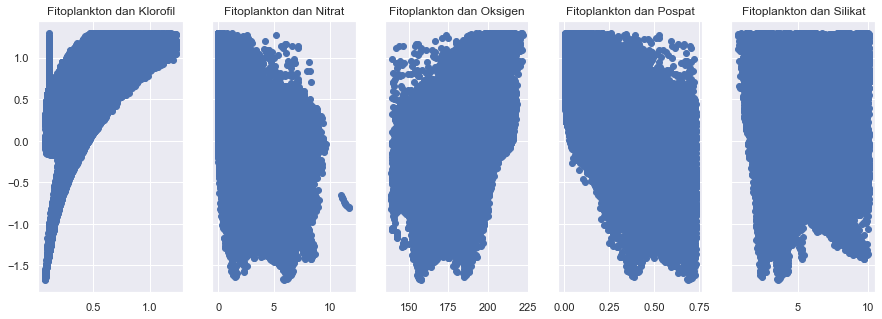

In [36]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,sharey=True,figsize = (15,5))
ax1.scatter(data_cleaned['chl [mg m-3]'], data_cleaned['log_fito'])
ax1.set_title('Fitoplankton dan Klorofil')
ax2.scatter(data_cleaned['no3 [mmol m-3]'], data_cleaned['log_fito'])
ax2.set_title('Fitoplankton dan Nitrat')
ax3.scatter(data_cleaned['o2 [mmol m-3]'], data_cleaned['log_fito'])
ax3.set_title('Fitoplankton dan Oksigen')
ax4.scatter(data_cleaned['po4 [mmol m-3]'], data_cleaned['log_fito'])
ax4.set_title('Fitoplankton dan Pospat')
ax5.scatter(data_cleaned['si [mmol m-3]'], data_cleaned['log_fito'])
ax5.set_title('Fitoplankton dan Silikat')

plt.show()

In [37]:
data_cleaned = data_cleaned.drop(['log_fito'],axis=1)

In [38]:
data_cleaned.columns.values

array(['chl [mg m-3]', 'depth [m]', 'no3 [mmol m-3]', 'o2 [mmol m-3]',
       'phyc [mmol m-3]', 'po4 [mmol m-3]', 'si [mmol m-3]'], dtype=object)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['chl [mg m-3]', 'no3 [mmol m-3]', 'o2 [mmol m-3]', 'po4 [mmol m-3]', 'si [mmol m-3]' ]]
vif = pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif["features"] = variables.columns


In [40]:
vif

,VIF,features
0,4.955196,chl [mg m-3]
1,7.277282,no3 [mmol m-3]
2,15.502294,o2 [mmol m-3]
3,13.927583,po4 [mmol m-3]
4,10.636687,si [mmol m-3]


In [41]:
data_no_multicollinearity = data_cleaned.drop(['o2 [mmol m-3]','po4 [mmol m-3]','si [mmol m-3]', 'depth [m]'], axis=1)

In [42]:
data_no_multicollinearity

,chl [mg m-3],no3 [mmol m-3],phyc [mmol m-3]
0,0.09910,0.00280,1.83672
1,0.09933,0.00295,1.84343
2,0.09967,0.00306,1.83328
3,0.09939,0.00333,1.81943
4,0.09993,0.00394,1.81756
...,...,...,...
545309,0.12542,1.86904,0.32362
545310,0.15281,1.85197,0.39221
545311,0.15100,1.75586,0.41870
545312,0.16022,1.96952,0.43118


In [43]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [44]:
data_with_dummies.head()

,chl [mg m-3],no3 [mmol m-3],phyc [mmol m-3]
0,0.09910,0.00280,1.83672
1,0.09933,0.00295,1.84343
2,0.09967,0.00306,1.83328
3,0.09939,0.00333,1.81943
4,0.09993,0.00394,1.81756


In [45]:
data_with_dummies.columns.values

array(['chl [mg m-3]', 'no3 [mmol m-3]', 'phyc [mmol m-3]'], dtype=object)

In [46]:
cols = ['chl [mg m-3]', 'no3 [mmol m-3]', 'phyc [mmol m-3]']


In [47]:
#data_preprocessed = data_with_dummies[cols]
#data_preprocessed.head()

data_preprocessed = data_no_multicollinearity
data_preprocessed.head()

,chl [mg m-3],no3 [mmol m-3],phyc [mmol m-3]
0,0.09910,0.00280,1.83672
1,0.09933,0.00295,1.84343
2,0.09967,0.00306,1.83328
3,0.09939,0.00333,1.81943
4,0.09993,0.00394,1.81756


In [48]:
targets = data_preprocessed['chl [mg m-3]']
inputs = data_preprocessed.drop(['chl [mg m-3]'], axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [50]:
inputs_scaled = scaler.transform(inputs)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [53]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [54]:
y_hat = reg.predict(x_train)

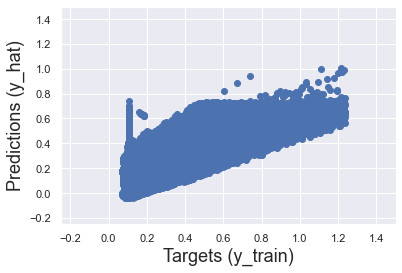

In [55]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(-0.25,1.5)
plt.ylim(-0.25,1.5)
plt.show()

C:\Users\ydhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

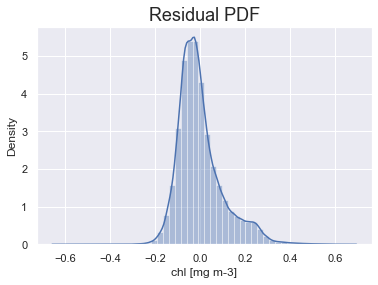

In [56]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size= 18)

In [57]:
reg.score(x_train, y_train)

0.4799050778880237

In [58]:
reg.intercept_

0.2278554609121268

In [59]:
reg.coef_

array([0.08308784, 0.09783743])

In [60]:
reg.summary = pd.DataFrame(inputs.columns.values, columns=['Feature'])
reg.summary['Weights'] = reg.coef_
reg.summary

,Feature,Weights
0,no3 [mmol m-3],0.083088
1,phyc [mmol m-3],0.097837


In [61]:
y_hat_test = reg.predict(x_test)

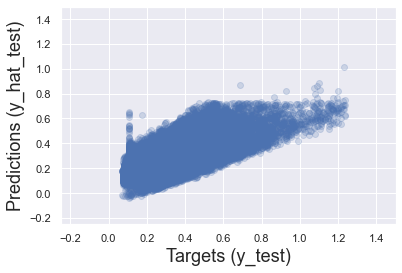

In [62]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(-0.25,1.5)
plt.ylim(-0.25,1.5)
plt.show()

In [63]:
df_pf = pd.DataFrame(y_hat_test,columns=['Prediction'])
df_pf.head()

# Jika Menggunakan log di awal maka
# df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
# df_pf.head()


,Prediction
0,0.227679
1,0.168535
2,0.125635
3,0.252241
4,0.226827


In [64]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,0.227679,NaN
1,0.168535,NaN
2,0.125635,1.104806
3,0.252241,NaN
4,0.226827,NaN
...,...,...
109058,0.138917,NaN
109059,0.175760,NaN
109060,0.513400,NaN
109061,0.436010,NaN


In [65]:
y_test

6353      0.12611
271860    0.12429
498360    0.15092
47130     0.35445
465968    0.17288
           ...   
411901    0.11065
229088    0.09751
269412    0.49594
148176    0.32688
472763    0.20728
Name: chl [mg m-3], Length: 109063, dtype: float64

In [66]:
y_test = y_test.reset_index(drop=True)
y_test

0         0.12611
1         0.12429
2         0.15092
3         0.35445
4         0.17288
           ...   
109058    0.11065
109059    0.09751
109060    0.49594
109061    0.32688
109062    0.20728
Name: chl [mg m-3], Length: 109063, dtype: float64

In [67]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,0.227679,1.134407
1,0.168535,1.132344
2,0.125635,1.162904
3,0.252241,1.425396
4,0.226827,1.188723
...,...,...
109058,0.138917,1.117004
109059,0.175760,1.102422
109060,0.513400,1.642041
109061,0.436010,1.386635


In [68]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Differences%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [69]:
df_pf

,Prediction,Target,Residual,Differences%
0,0.227679,1.134407,0.906728,79.929684
1,0.168535,1.132344,0.963809,85.116288
2,0.125635,1.162904,1.037269,89.196441
3,0.252241,1.425396,1.173155,82.303795
4,0.226827,1.188723,0.961897,80.918465
...,...,...,...,...
109058,0.138917,1.117004,0.978087,87.563402
109059,0.175760,1.102422,0.926663,84.056973
109060,0.513400,1.642041,1.128642,68.734062
109061,0.436010,1.386635,0.950625,68.556248


In [70]:
df_pf.describe()

,Prediction,Target,Residual,Differences%
count,109063.000000,109063.000000,109063.000000,109063.000000
mean,0.227686,1.271030,1.043344,82.401195
std,0.097514,0.208559,0.158661,5.669594
min,-0.040710,1.073667,0.458281,41.247758
25%,0.159904,1.127700,0.946841,79.080230
50%,0.205896,1.198955,1.000887,82.913749
75%,0.274929,1.348577,1.090166,86.461402
max,1.014113,3.444918,2.821899,103.664028


In [71]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x : '%.2f' % x)
df_pf
#df_pf.sort_values(by=['Differences%'])

,Prediction,Target,Residual,Differences%
0,0.23,1.13,0.91,79.93
1,0.17,1.13,0.96,85.12
2,0.13,1.16,1.04,89.20
3,0.25,1.43,1.17,82.30
4,0.23,1.19,0.96,80.92
...,...,...,...,...
109058,0.14,1.12,0.98,87.56
109059,0.18,1.10,0.93,84.06
109060,0.51,1.64,1.13,68.73
109061,0.44,1.39,0.95,68.56
